In [2]:
import numpy as np
from skimage.morphology import medial_axis, skeletonize
import matplotlib.pyplot as plt
import pandas
import networkx as nx
import sknw
import glob
import os

In [3]:
morph = np.array(pandas.read_csv('data/data_0.558_2.4_000180.txt', delimiter=' ', header=None)).swapaxes(0, 1)
skel, distance = medial_axis(morph, return_distance=True)
skel

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True, False, False, ..., False, False,  True],
       [ True, False, False, ..., False, False,  True],
       [False,  True,  True, ..., False, False,  True]])

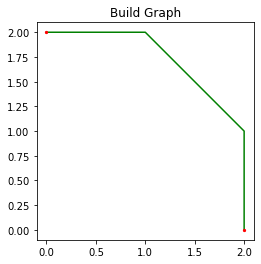

In [16]:
graph = sknw.build_sknw(skel)
for (s,e) in graph.edges():
    ps = graph[s][e]['pts']
    plt.plot(ps[:,1], ps[:,0], 'green', zorder=-1)
    
# draw node by o
nodes = graph.nodes()
ps = np.array([nodes[i]['o'] for i in nodes], dtype = int)
plt.scatter(ps[:,1], ps[:,0], s = 5, c ='r')

# title and show
plt.title('Build Graph')

plt.gca().set_aspect('equal')
#plt.savefig('my_plot.png',dpi=1200)


In [5]:
plt.show()

In [15]:
morph = np.array([[1,1,1],\
                [1,1,1],\
                [1,1,1]])
skel, distance = medial_axis(morph, return_distance=True)

In [6]:
set(np.array([list(graph.nodes[n].keys()) for n in graph.nodes()]).flatten())


{'o', 'pts'}

In [18]:
for n1 in graph.nodes():
    print(graph.nodes[n1]['o'])


[0. 2.]
[2. 0.]


In [19]:
for node1, node2, data in graph.edges(data=True):
    #print(data['pts'])
    print(node1, " ", node2)

0   1


In [20]:
def getEndJunction(graph):
    l = [graph.degree[n] for n in graph.nodes()]
    return l.count(1), l.count(3)
        

In [24]:
[E, J] = getEndJunction(graph)
B = graph.number_of_edges
B

<bound method Graph.number_of_edges of <networkx.classes.graph.Graph object at 0x7f0533c3c0d0>>

In [29]:
def getBranchLen(graph):
    b_l = [graph.edges[e]['weight'] for e in graph.edges()]
    return np.array([len(b_l), sum(b_l)/len(b_l)])

In [30]:
getBranchLen(graph)


array([1.        , 3.41421356])

In [13]:
dist_on_skel = distance * skel

max(map(max, dist_on_skel))
#min(map(min, dist_on_skel))
d = dist_on_skel[skel]
len(d)

1304

## Test SKNW for Cahn-Hillard dataset. 
 

In [10]:
#os.chdir(r'/Users/devyanijivani/git/pygraspi/notebooks/data')
dest = "/Users/devyanijivani/git/pygraspi/notebooks/junctions"
myFiles = glob.glob('*.txt')
myFiles.sort()

for i, file in enumerate(myFiles):
    morph = np.array(pandas.read_csv(file, delimiter=' ', header=None)).swapaxes(0, 1)
    skel, distance = medial_axis(morph, return_distance=True)
    graph = sknw.build_sknw(skel)
    for (s,e) in graph.edges():
        ps = graph[s][e]['pts']
        plt.plot(ps[:,1], ps[:,0], 'green', zorder=-1)

    # draw node by o
    nodes = graph.nodes()
    ps = np.array([nodes[i]['o'] for i in nodes], dtype = int)
    plt.scatter(ps[:,1], ps[:,0], s = 1, c ='r')

    # title and show
    plt.title('Build Graph')
    
    plt.gca().set_aspect('equal')
    print(os.path.splitext(file)[0])
    
    file_loc = os.path.join(dest, os.path.splitext(file)[0]+'.png')
    #print(file_loc)
    #plt.savefig(file_loc,dpi=1200)
    
    plt.close()


data_0.514_2.4_000080
data_0.514_2.4_000100
data_0.514_2.4_000140
data_0.514_2.4_000160
data_0.514_2.4_000180
data_0.514_2.4_000220
data_0.514_2.4_000280
data_0.514_2.4_000440
data_0.514_2.4_000480
data_0.514_2.4_000560
data_0.514_2.4_000620
data_0.514_2.4_000760
data_0.514_2.4_000880
data_0.514_2.4_001240
data_0.514_2.4_001800
data_0.514_2.4_002480
data_0.514_2.4_004660
data_0.514_2.4_006400
data_0.514_2.6_000080
data_0.514_2.6_000100
data_0.514_2.6_000140
data_0.514_2.6_000180
data_0.514_2.6_000220
data_0.514_2.6_000240
data_0.514_2.6_000260
data_0.514_2.6_000340
data_0.514_2.6_000420
data_0.514_2.6_000460
data_0.514_2.6_000540
data_0.514_2.6_000600
data_0.514_2.6_000680
data_0.514_2.6_000980
data_0.514_2.6_002660
data_0.514_2.6_004160
data_0.514_2.6_005600
data_0.514_2.6_006460
data_0.514_2.8_000100
data_0.514_2.8_000120
data_0.514_2.8_000140
data_0.514_2.8_000200
data_0.514_2.8_000240
data_0.514_2.8_000320
data_0.514_2.8_000400
data_0.514_2.8_000460
data_0.514_2.8_000600
data_0.514

data_0.543_2.4_000100
data_0.543_2.4_000160
data_0.543_2.4_000200
data_0.543_2.4_000240
data_0.543_2.4_000280
data_0.543_2.4_000320
data_0.543_2.4_000460
data_0.543_2.4_000600
data_0.543_2.4_000740
data_0.543_2.4_001040
data_0.543_2.4_001300
data_0.543_2.4_001400
data_0.543_2.4_001980
data_0.543_2.4_003400
data_0.543_2.4_005620
data_0.543_2.4_006400
data_0.543_2.6_000040
data_0.543_2.6_000060
data_0.543_2.6_000080
data_0.543_2.6_000100
data_0.543_2.6_000120
data_0.543_2.6_000140
data_0.543_2.6_000160
data_0.543_2.6_000200
data_0.543_2.6_000240
data_0.543_2.6_000300
data_0.543_2.6_000360
data_0.543_2.6_000440
data_0.543_2.6_000500
data_0.543_2.6_000560
data_0.543_2.6_000740
data_0.543_2.6_001240
data_0.543_2.6_002260
data_0.543_2.6_003380
data_0.543_2.6_003900
data_0.543_2.6_006020
data_0.543_2.8_000040
data_0.543_2.8_000080
data_0.543_2.8_000100
data_0.543_2.8_000120
data_0.543_2.8_000160
data_0.543_2.8_000200
data_0.543_2.8_000260
data_0.543_2.8_000360
data_0.543_2.8_000460
data_0.543

In [3]:
pwd

'/Users/devyanijivani/git/pygraspi/notebooks'

In [36]:
def skeletonize(morph):
    skel, distance = medial_axis(morph, return_distance=True)
    return skel, distance    

In [39]:
morph = np.array([[1,1,1],\
                [1,1,1],\
                [1,1,1]])
skel = skeletonize(morph)[0]

In [40]:
skel

array([[False, False,  True],
       [False, False,  True],
       [ True,  True, False]])

In [41]:
def getEndJunction(graph):
    l = [graph.degree[n] for n in graph.nodes()]
    return np.array([l.count(1), l.count(3)])


In [43]:
graph = sknw.build_sknw(skel)

In [44]:
getEndJunction(graph)

array([2, 0])

In [49]:
def getBranchLen(graph):
    b_l = [graph.edges[e]['weight'] for e in graph.edges()]
    return np.array([len(b_l), round(sum(b_l)/len(b_l), 2)])        


In [50]:
getBranchLen(graph)

array([1.  , 3.41])